# The Daily Buzz 

### Rainfall Prediction using Classification models

### Importing necessary library and uploading the data

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_excel("C:/Users/hp/Desktop/INTERNSHALA DATA SCIENCE/Python/Assignment/Final Project 2/sydney_rain prediction.xlsx", header =0)

In [32]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


## Data Preprocessing

In [39]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3337,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,2012-10-16 01:24:34.737788672,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
min,2008-02-01 00:00:00,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,2010-05-15 00:00:00,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,2012-09-28 00:00:00,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,2015-03-14 00:00:00,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,2017-06-25 00:00:00,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000
std,NaN,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

### Finding the null values

In [37]:
df.isnull().sum()

Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

##### Filling the null values with the mean of their column

In [58]:
colums_with_na = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']

In [60]:
df[colums_with_na] = df[colums_with_na].fillna(df[colums_with_na].mean())

##### Filling the null values of Rain today column with mode values

In [110]:
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])

##### Checking if there is still any null values remained

In [118]:
df.isnull().sum()

Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

In [120]:
df.head() 

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


#### Outlier Treatment

1. checking with the outlier graphically using boxplots
2. creating a new function called remove_outliers_iqr to remove the outlier from numerical data
3. creating a new dataframe for all the new data called data_cleaned

<Figure size 1500x1000 with 0 Axes>

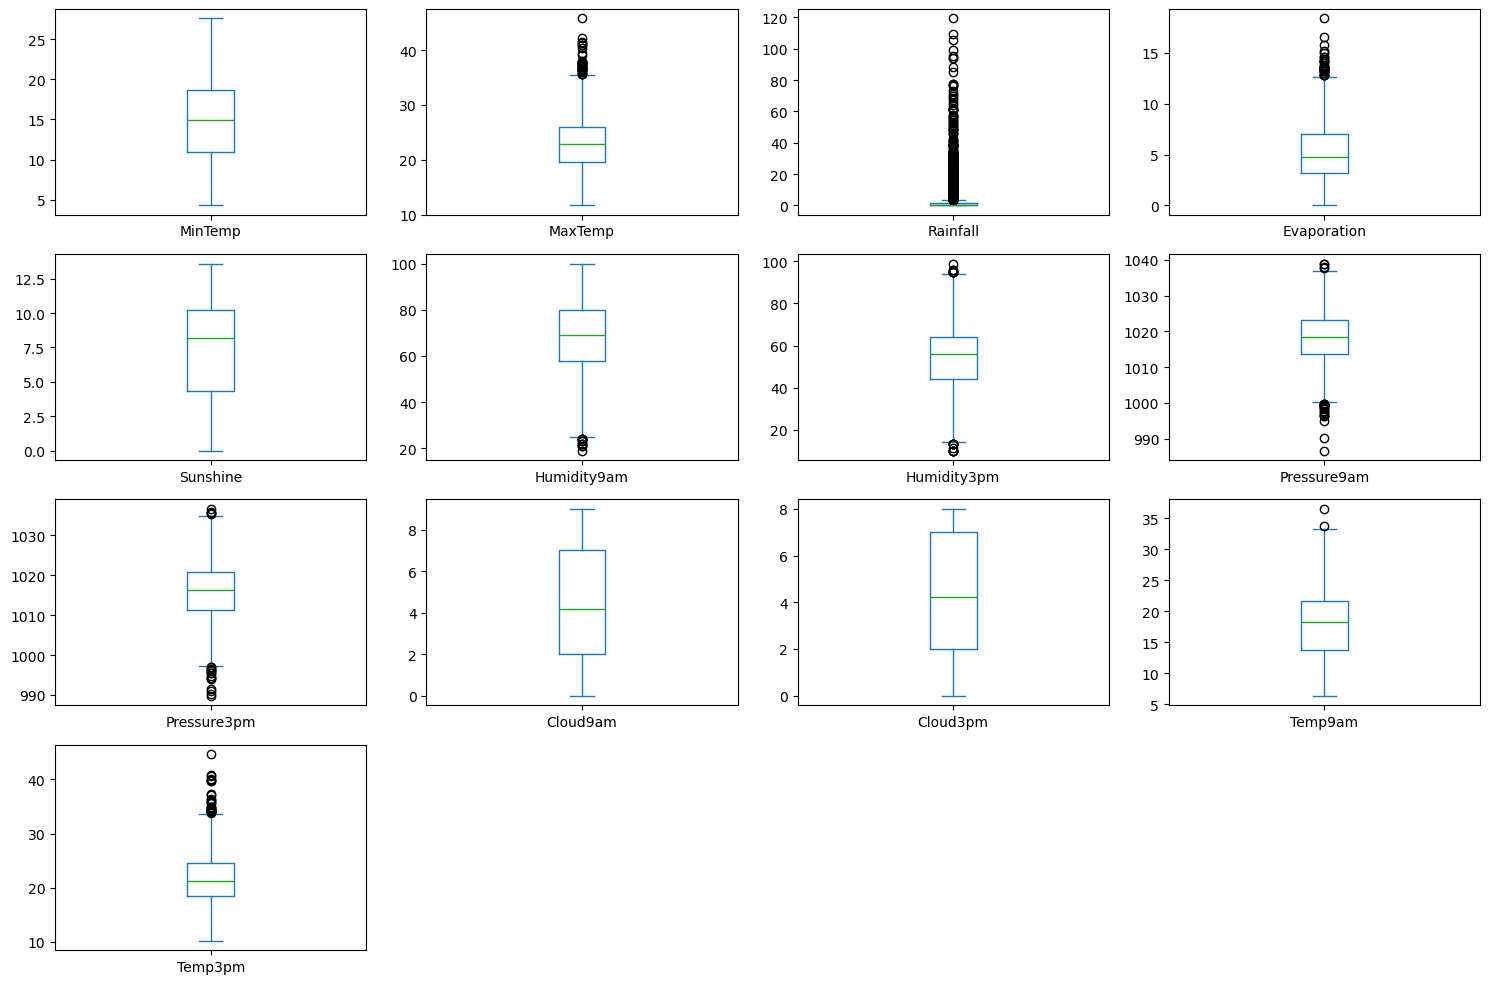

In [122]:
plt.figure(figsize=(15, 10))  # Adjust the figure size if needed
df.select_dtypes(include=['float64', 'int64']).plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [794]:
def remove_outliers_iqr(df):
    df_cleaned = df.copy()
    
    for column in df_cleaned.select_dtypes(include=['float64', 'int64']):
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
      # Removing outliers
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned


df_cleaned = remove_outliers_iqr(df)
print(df_cleaned)

           Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
5    2008-02-06   Sydney     20.2     27.2       1.6          2.6       8.6   
10   2008-02-11   Sydney     16.4     23.9       0.0          6.4       8.0   
11   2008-02-12   Sydney     18.9     27.3       0.0          6.8       6.7   
13   2008-02-14   Sydney     16.9     24.3       3.0          3.2       8.7   
14   2008-02-15   Sydney     18.3     24.4       0.0          6.2       8.5   
...         ...      ...      ...      ...       ...          ...       ...   
3332 2017-06-21   Sydney      8.6     19.6       0.0          2.0       7.8   
3333 2017-06-22   Sydney      9.3     19.2       0.0          2.0       9.2   
3334 2017-06-23   Sydney      9.4     17.7       0.0          2.4       2.7   
3335 2017-06-24   Sydney     10.1     19.3       0.0          1.4       9.3   
3336 2017-06-25   Sydney      7.6     19.3       0.0          3.4       9.4   

      Humidity9am  Humidity3pm  Pressure9am  Pressu

#### Changing categorical data to numerical as below:

1. RainToday: Yes as 1 and No as 0
2. RainTomorrow: Yes as 1 and No as 0

In [172]:
df_cleaned['RainToday'] = df_cleaned['RainToday'].astype("category").cat.codes

In [174]:
df_cleaned['RainTomorrow'] = df_cleaned['RainTomorrow'].astype("category").cat.codes

##### Dropping the date and location column as we don't need it

In [ ]:
df_cleaned = df_cleaned.drop(['Date'], axis=1)

In [ ]:
df_cleaned = df_cleaned.drop(['Location'], axis=1)

In [329]:
df_cleaned.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
5,20.2,27.2,1.6,2.6,8.6,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,1,1
10,16.4,23.9,0.0,6.4,8.0,78.0,53.0,1017.6,1015.3,7.0,8.0,18.9,23.7,0,0
11,18.9,27.3,0.0,6.8,6.7,68.0,67.0,1010.7,1007.5,7.0,7.0,22.9,24.7,0,1
13,16.9,24.3,3.0,3.2,8.7,81.0,51.0,1017.2,1016.5,7.0,1.0,18.4,23.3,1,0
14,18.3,24.4,0.0,6.2,8.5,80.0,56.0,1020.2,1018.9,7.0,3.0,19.5,23.8,0,0


### Correlation matrix

In [332]:
df_cleaned.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.791636,0.020565,0.612651,-0.070757,0.102261,0.368017,-0.376928,-0.331864,0.271450,0.161380,0.944583,0.778671,0.014927,0.070055
MaxTemp,0.791636,1.000000,-0.109432,0.533934,0.274124,-0.064719,0.015570,-0.369834,-0.393224,-0.017274,-0.065632,0.861916,0.958374,-0.103894,-0.096581
Rainfall,0.020565,-0.109432,1.000000,-0.178753,-0.222753,0.236677,0.198575,0.020493,0.055934,0.179255,0.166991,-0.034111,-0.109115,0.888741,0.217194
Evaporation,0.612651,0.533934,-0.178753,1.000000,0.158307,-0.351800,0.004111,-0.360325,-0.307749,0.024085,-0.017059,0.646908,0.505402,-0.154481,-0.027905
Sunshine,-0.070757,0.274124,-0.222753,0.158307,1.000000,-0.403543,-0.491483,-0.028517,-0.064606,-0.635079,-0.661414,0.090100,0.292701,-0.208060,-0.428153
Humidity9am,0.102261,-0.064719,0.236677,-0.351800,-0.403543,1.000000,0.610257,0.291425,0.259198,0.347340,0.286034,-0.073259,-0.032883,0.208493,0.209311
Humidity3pm,0.368017,0.015570,0.198575,0.004111,-0.491483,0.610257,1.000000,0.135488,0.147711,0.411861,0.435737,0.259503,-0.046055,0.183389,0.368366
Pressure9am,-0.376928,-0.369834,0.020493,-0.360325,-0.028517,0.291425,0.135488,1.000000,0.957367,-0.026538,-0.048589,-0.406812,-0.324508,0.026262,-0.060926
Pressure3pm,-0.331864,-0.393224,0.055934,-0.307749,-0.064606,0.259198,0.147711,0.957367,1.000000,-0.008557,-0.023093,-0.382504,-0.356103,0.055206,-0.027591
Cloud9am,0.271450,-0.017274,0.179255,0.024085,-0.635079,0.347340,0.411861,-0.026538,-0.008557,1.000000,0.589690,0.145397,-0.021977,0.158677,0.249285


In [334]:
correlation = df_cleaned.corr()

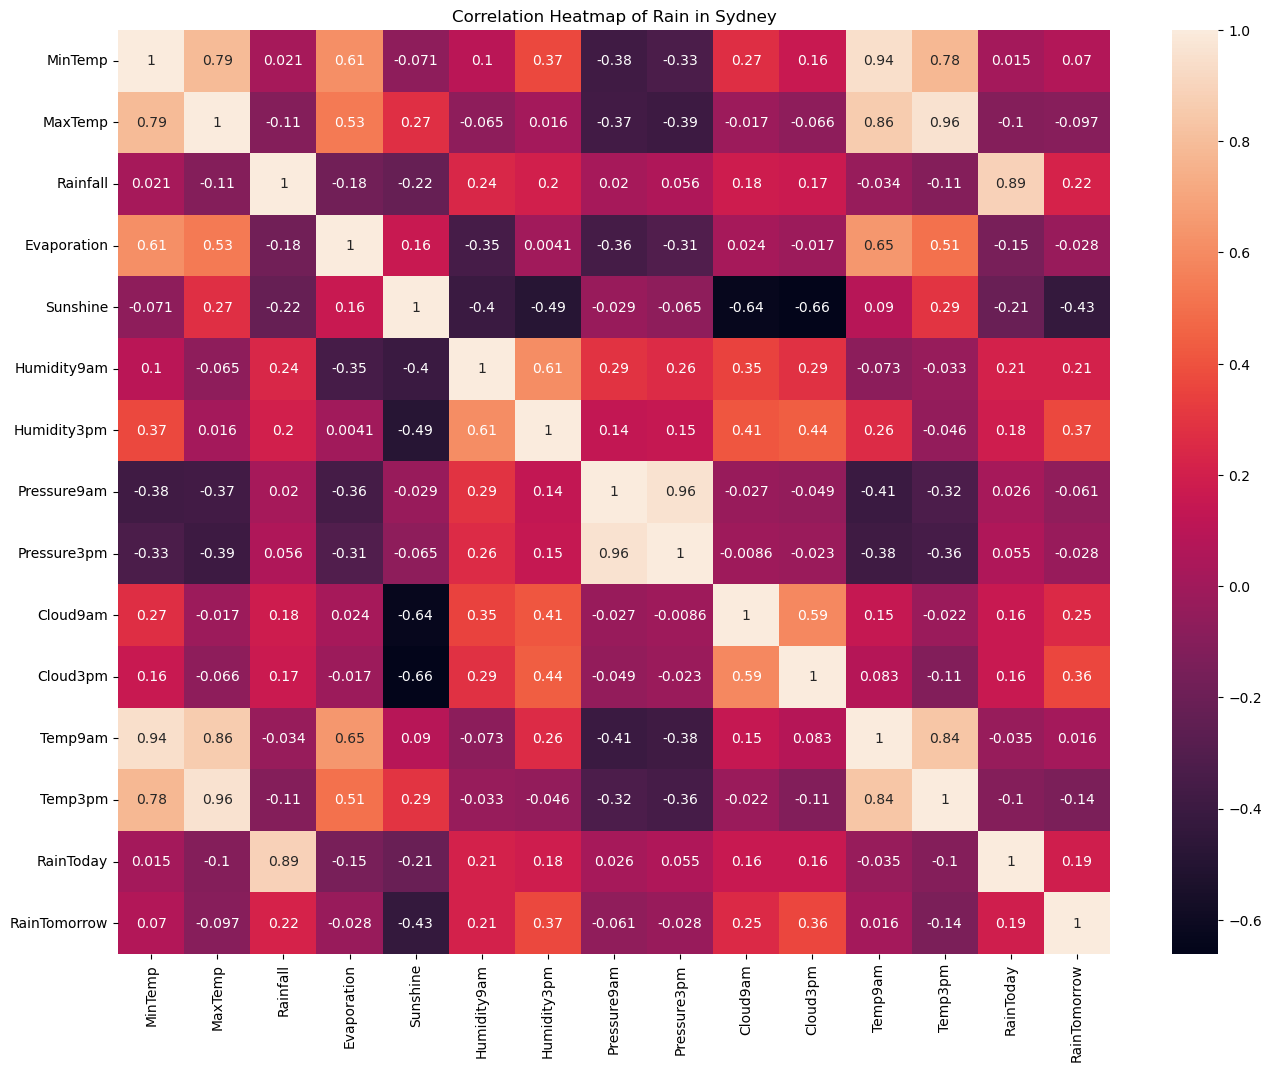

In [336]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Sydney')
ax = sns.heatmap(correlation, annot=True, linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels())           
plt.show()


### Correlation Matrix Insights

From the above correlation heat map, we can conclude that :-

MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 9.

MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.94)

MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.78)

MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.86)

MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.96)
ent = 0.69).

Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coeficient = 0.96).

Temp9am and Temp3pm variables are strongly positively correlated (correlation 4oefficient = 0.86)

## Train Test Split

##### Splitting X and y variables as

X being all the variables excluding our target variable which is y (Rain Tomorrow)

In [382]:
from sklearn.model_selection import train_test_split

In [384]:
X = df_cleaned.drop(['RainTomorrow'], axis=1)

In [386]:
y = df_cleaned['RainTomorrow']

In [388]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [390]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2086, 14) (522, 14) (2086,) (522,)


### Model 1. Logistic Regression


##### Importing necessary libraries to run the model

In [394]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [396]:
lr = LogisticRegression()

lr.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##### Make Predictions

In [439]:
y_test_lr_pred = lr.predict(x_test)

In [441]:
y_train_lr_pred = lr.predict(x_train)

#### Model Evaluation

Using Accuracy score and confusion matrix

In [454]:
lr_ac_score = accuracy_score(y_test, y_test_lr_pred)

print(f"Accuracy score of Logistic Regression test data is {lr_ac_score}")

Accuracy score of Logistic Regression test data is 0.8390804597701149


In [446]:
accuracy_score(y_train, y_train_lr_pred)

0.8494726749760306

In [456]:
# Confusion Matrix

lr_cf = confusion_matrix(y_test, y_test_lr_pred)

lr_cf

array([[403,  25],
       [ 59,  35]], dtype=int64)

#### Predict proba method

this method gives the probability for the target variable being 0 and 1

In [463]:
# probability of getting output 0 as no rain
lr.predict_proba(x_test)[:,0]

array([0.96992055, 0.94086839, 0.96127498, 0.82117461, 0.88264962,
       0.95316427, 0.90395009, 0.50104425, 0.87858446, 0.89696005,
       0.56135216, 0.89425094, 0.63689813, 0.78376013, 0.75131565,
       0.91049921, 0.78923677, 0.98162607, 0.62501174, 0.32359353,
       0.92741722, 0.94885333, 0.9784985 , 0.757174  , 0.91833922,
       0.96949038, 0.9419216 , 0.92374498, 0.96304884, 0.9554158 ,
       0.95429702, 0.95895668, 0.95426439, 0.88442844, 0.74850172,
       0.98367181, 0.9091202 , 0.42778502, 0.96634968, 0.98217056,
       0.98022932, 0.90591939, 0.96705996, 0.91691096, 0.92773574,
       0.57700604, 0.40556206, 0.9574847 , 0.92497329, 0.70568068,
       0.87699498, 0.94837729, 0.41688121, 0.40552658, 0.94298916,
       0.47792096, 0.52028305, 0.78454837, 0.98785991, 0.15573177,
       0.87683607, 0.63328385, 0.93996966, 0.76810154, 0.51907652,
       0.71009338, 0.68388629, 0.26453238, 0.87756226, 0.9737326 ,
       0.98892744, 0.23369299, 0.97916637, 0.50253905, 0.97790

In [509]:
# probability of getting output 1 as  rain
y_proba = lr.predict_proba(x_test)[:,1]

#### Performance Metrics

1. Precision Score: it provides the score as how much our data has provided the good prediction
   it is calculated as true positives/(true positives + False positives)
3. Recall score: it provides the score of our model as correctly identified
   it is calculated as True Positives /(True positives + False Negatives)
5. Roc_Auc score: The ROC AUC score is the area under the ROC curve. The ROC curve plots the true positive rate (recall) against the false positive rate at various threshold settings.
6. The AUC (Area Under the Curve) measures the model's ability to discriminate between positive and negative classes

In [500]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score


In [505]:
lr_precision_score = precision_score(y_test, y_test_lr_pred)

print(f" Precision Score : {lr_precision_score}")

 Precision Score : 0.5833333333333334


In [507]:
lr_recall_score = recall_score(y_test, y_test_lr_pred)

print(f" Recall Score : {lr_recall_score}")

 Recall Score : 0.3723404255319149


In [513]:
lr_roc_auc_score = roc_auc_score(y_test, y_proba)

print(f" ROC AUC Score : {lr_roc_auc_score}")

 ROC AUC Score : 0.8065470272419965


## Model 2: Decision Tree

In [555]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [522]:
dc = DecisionTreeClassifier()

dc.fit(x_train, y_train)

DecisionTreeClassifier()

#### Make Predictions

In [530]:
y_test_dc_pred = dc.predict(x_test)


In [532]:
y_test_dc_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,

### Plotting Decision Tree

In [549]:
from sklearn.tree import plot_tree, export_text

In [570]:
dc2 = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth = 4, min_samples_split = 200)
dc2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, min_samples_split=200)

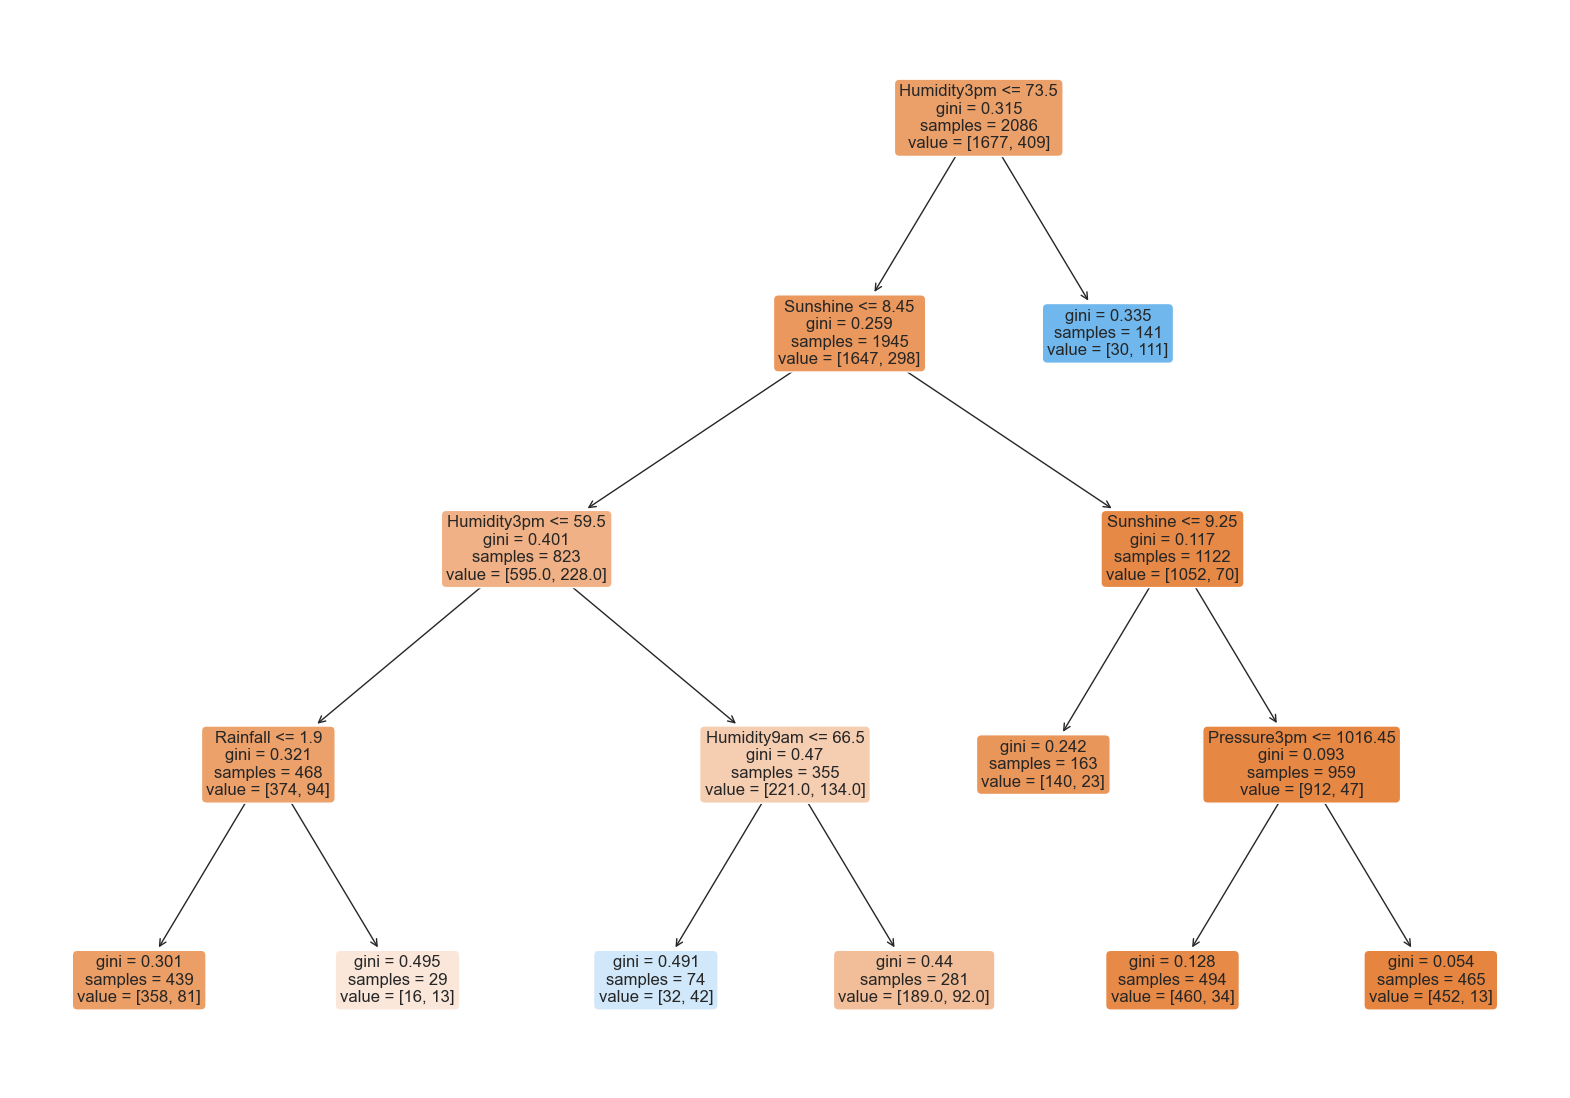

In [572]:
plt.figure(figsize =(20,14))
sns.set(style="whitegrid")
plot_tree(dc2, feature_names = x_train.columns, filled=True, rounded=True, fontsize=12);

#### Model Evaluation


In [579]:
print("Accuracy Score for Decision Tree Classifier is", accuracy_score(y_test, y_test_dc_pred))

Accuracy Score for Decision Tree Classifier is 0.7624521072796935


In [583]:
clf_report = classification_report(y_test, y_test_dc_pred)

In [585]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       428
           1       0.36      0.41      0.39        94

    accuracy                           0.76       522
   macro avg       0.61      0.63      0.62       522
weighted avg       0.78      0.76      0.77       522



In [710]:
roc_auc_score(y_test, y_test_dc_pred)

0.6268393318751242

## Model 3: Bagging Classifier

In [589]:
from sklearn.ensemble import BaggingClassifier

In [593]:
bag = BaggingClassifier(estimator=dc, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [595]:
bag.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

#### Model Evaluation 

In [598]:
confusion_matrix(y_test, bag.predict(x_test))

array([[406,  22],
       [ 64,  30]], dtype=int64)

In [602]:
print("Accuracy score of Bagging Classifier Model is", accuracy_score(y_test, bag.predict(x_test)))

Accuracy score of Bagging Classifier Model is 0.8352490421455939


In [706]:
bag_clf_report = classification_report(y_test, bag.predict(x_test))


print(bag_clf_report)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       428
           1       0.58      0.32      0.41        94

    accuracy                           0.84       522
   macro avg       0.72      0.63      0.66       522
weighted avg       0.81      0.84      0.82       522



In [712]:
roc_auc_score(y_test, bag.predict(x_test))

0.6338735335056671

## Model 4: Random Forest

In [605]:
from sklearn.ensemble import RandomForestClassifier

In [647]:
rf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [649]:
confusion_matrix(y_test, rf.predict(x_test))

array([[411,  17],
       [ 64,  30]], dtype=int64)

In [651]:
print("Accuracy score of Random Forest Classifier Model is", accuracy_score(y_test, rf.predict(x_test)))

Accuracy score of Random Forest Classifier Model is 0.8448275862068966


In [655]:
rf_clf_report = classification_report(y_test, rf.predict(x_test))

In [657]:
print(rf_clf_report)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       428
           1       0.64      0.32      0.43        94

    accuracy                           0.84       522
   macro avg       0.75      0.64      0.67       522
weighted avg       0.82      0.84      0.82       522



In [714]:
roc_auc_score(y_test, rf.predict(x_test))

0.6397146550009942

## Model 5: Boosting techniques

1. Gradient Boosting
2. XGB Boosting

### 1. Gradient Boosting

In [661]:
from sklearn.ensemble import GradientBoostingClassifier


In [663]:
gb_boosting = GradientBoostingClassifier(learning_rate =0.02, n_estimators = 1000, max_depth=4)

gb_boosting.fit(x_train, y_train)


GradientBoostingClassifier(learning_rate=0.02, max_depth=4, n_estimators=1000)

In [665]:
print("Accuracy score of Gradient Boosting Model is", accuracy_score(y_test, gb_boosting.predict(x_test)))

Accuracy score of Gradient Boosting Model is 0.8467432950191571


In [667]:
confusion_matrix(y_test, gb_boosting.predict(x_test))

array([[407,  21],
       [ 59,  35]], dtype=int64)

In [669]:
gb_clf_report = classification_report(y_test, gb_boosting.predict(x_test))


print(gb_clf_report)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       428
           1       0.62      0.37      0.47        94

    accuracy                           0.85       522
   macro avg       0.75      0.66      0.69       522
weighted avg       0.83      0.85      0.83       522



In [716]:
roc_auc_score(y_test, gb_boosting.predict(x_test))

0.6616375024855836

### 2. XGB Boosting

In [691]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


In [780]:
xgb_boosting = xgb.XGBClassifier(max_depth=4, n_estimators=10000, learning_rate=0.3,
                           		 n_jobs =-1)
xgb_boosting.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10000, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [781]:
print("Accuracy score of XGB Boosting Model is", accuracy_score(y_test, xgb_boosting.predict(x_test)))

Accuracy score of XGB Boosting Model is 0.8275862068965517


In [782]:
confusion_matrix(y_test, xgb_boosting.predict(x_test))

array([[398,  30],
       [ 60,  34]], dtype=int64)

In [783]:
xgb_clf_report = classification_report(y_test, xgb_boosting.predict(x_test))


print(gb_clf_report)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       428
           1       0.62      0.37      0.47        94

    accuracy                           0.85       522
   macro avg       0.75      0.66      0.69       522
weighted avg       0.83      0.85      0.83       522



In [784]:
roc_auc_score(y_test, xgb_boosting.predict(x_test))

0.6458043348578246

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

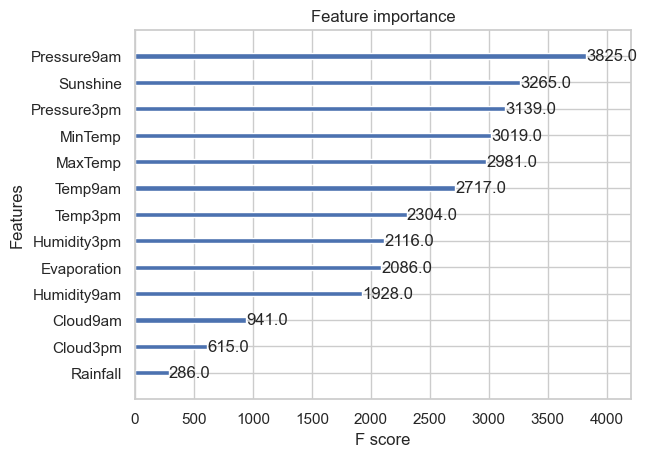

In [683]:
xgb.plot_importance(xgb_boosting)

In [696]:
param_grid = {
    'n_estimators': [100,300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

In [697]:
xgb_clf = xgb.XGBClassifier(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='reg:squarederror', ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9], 'n_estimators': [100, 300],
                         'subsample': [0.8, 1.0]})

In [733]:
grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}

In [735]:
grid_search.best_score_

0.8456338377573803

## Comparison of Different Model used

In [743]:
Model = {'Logistic Regression':[0.84,0.58,0.37, 0.81], 
         'Decision Tree':[0.76,0.87,0.84,0.63], 
         'Bagging':[0.84,0.86,0.95,0.63], 
         'Random Forest':[0.84,0.87,0.96,0.64],
         'Gradient Boosting':[0.85,0.87,0.95,0.66],
          'XGB Boosting':[0.83,0.87,0.95,0.65]}


In [745]:
Comparison = pd.DataFrame(Model, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'ROC AUC Score'] )

In [747]:
Comparison = Comparison.T

In [749]:
Comparison

,Accuracy Score,Precision Score,Recall Score,ROC AUC Score
Logistic Regression,0.84,0.58,0.37,0.81
Decision Tree,0.76,0.87,0.84,0.63
Bagging,0.84,0.86,0.95,0.63
Random Forest,0.84,0.87,0.96,0.64
Gradient Boosting,0.85,0.87,0.95,0.66
XGB Boosting,0.83,0.87,0.95,0.65


# Model Insights

Logistic Regression has high ROC AUC (0.81) but suffers from low precision (0.58) and recall (0.37). This model is good for ranking but we cannot rely on its predictions.

Decision Tree performs poorly compared to others, with low accuracy (0.76) and ROC AUC (0.63), though it has good recall (0.84).

Bagging, Random Forest, and Boosting Models (including XGBoost) have strong precision and recall, indicating they are reliable in classification but suffer from lower ROC AUC scores.



# Conclusion

If we look at the precision and recall (e.g., minimizing false positives and false negatives), Random Forest and Gradient Boosting perform best.

If ROC AUC (ranking and threshold discrimination) is critical for the organization, Logistic Regression might be a good choice despite its lower precision and recall.

Ensemble methods like Gradient Boosting and Random Forest offer a balanced performance with high precision and recall, making them strong choices for most tasks.

# Answer to the Tasks

#### 1. The problem statement is provided by The Daily Buzz which is a small newspaper company and they provide all the news with the weather conditions of the city as well and they want me to provide a best machine learning model for the prediction of rainfall for the weeks so that they can provide the accurate estimation to the public through which a good information provider will be enhanced by public with their accurate estimated information shared

#### 3. My approach to solving this task is to use scikit learn libraries for better understanding and providing good results for classification models and get the 4 scores which are Accuracy score, Precision Score, Recall Score and ROC AUC Score


#### 3. We have different models to work on categorical data,  i have basically used 6 Machine learning algorithms (Logistic Regression, Decision Tree, Bagging, Random Forest, Gradient Boosting and XGB Boost classifier) which i thought are best among other models when we have categorical data and dependency of the data on different variables

#### 4. By looking at the different approaches i had i came on to the result as below: 
#### If we look at the precision and recall (e.g., minimizing false positives and false negatives), Random Forest and Gradient Boosting perform best.
#### If ROC AUC (ranking and threshold discrimination) is critical for the organization, Logistic Regression might be a good choice despite its lower precision and recall.
#### Ensemble methods like Gradient Boosting and Random Forest offer a balanced performance with high precision and recall, making them strong choices for most tasks.

#### 5. For further enhancement and better performance of the model we can look at the fitting of the data, as it may be overfitting or may have other threshold discrimination to get the better results